In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
X=data.iloc[:,2:4].values

In [5]:
X.shape

(400, 2)

In [6]:
y=data.iloc[:,-1].values

In [7]:
y.shape

(400,)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [9]:
X_train.shape

(320, 2)

In [10]:
X_test.shape

(80, 2)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.metrics import accuracy_score,recall_score

In [16]:
accuracy=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [17]:
len(accuracy)

25

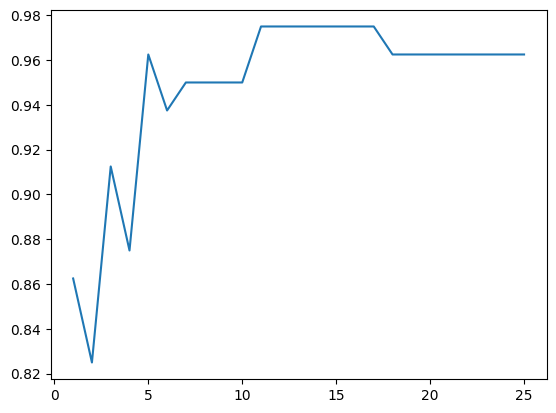

In [18]:
plt.plot(range(1,26),accuracy)

In [19]:
knn=KNeighborsClassifier(n_neighbors=11,algorithm='kd_tree')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=11)

In [20]:
y_pred=knn.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.975

In [22]:
recall_score(y_test,y_pred)

0.9642857142857143

In [22]:
from joblib import dump

In [23]:
dump(knn,'./../savedModels/model.joblib')

['./../savedModels/model.joblib']

In [24]:
dump(scaler,'./../savedModels/scaler.joblib')

['./../savedModels/scaler.joblib']